###### Dataset link : https://www.kaggle.com/datasets/geomack/spotifyclassification

1. Top 5 most popular artists
2. Top 5 loudest tracks
3. Artist with most danceability song
4. Top 10 instrumentalness tracks
5. Multiple feature plots : 
    a. tempo
    b. loudness
    c. danceability
    d. acousticness
    e. duration_ms
    f. energy
    g. insrumentalness
    h. liveness
    i. speachiness
    j. valence
6. Top 10 energetic tracks
7. Most common durations
8. Top 10 tracks with most valence


##### Spotify API :https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statistics as st

### Load the dataset

In [2]:
df = pd.read_csv('data.csv')

In [40]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
df.drop("Unnamed: 0", axis= 1, inplace = True)

In [7]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


### Data Cleaning

In [8]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [9]:
df.shape

(2017, 16)

In [10]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

### Data Analysis

#### Top 5 most popular artists

In [11]:
top_five_artists = df['artist'].value_counts().head()

In [12]:
top_five_artists

Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: artist, dtype: int64

<AxesSubplot:>

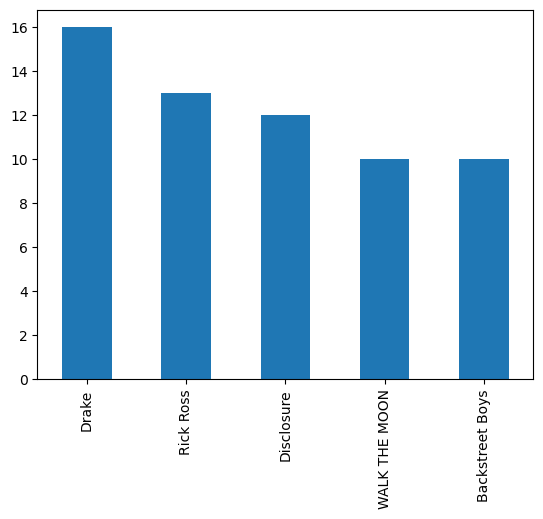

In [13]:
top_five_artists.plot.bar()

#### Top 5 loudest tracks
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

In [14]:
top_five_loud_tracks = df[["loudness","song_title"]].sort_values(by = "loudness", ascending =False).head()

In [15]:
top_five_loud_tracks

,loudness,song_title
195,-0.307,GodLovesUgly
636,-0.718,The Lion - Original Mix
1443,-0.787,The Wall
2010,-0.935,Hey Baby - Steve Aoki Remix
1299,-0.994,No Absolution


<AxesSubplot:title={'center':'Top 5 loudest tracks'}, xlabel='loudness', ylabel='song_title'>

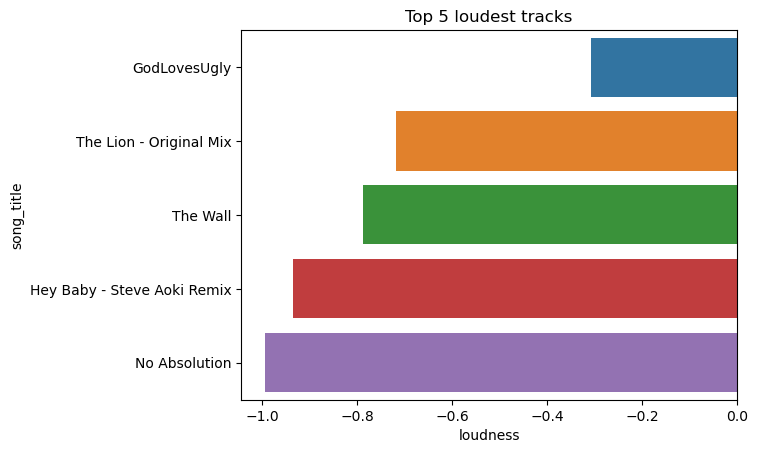

In [16]:
plt.title("Top 5 loudest tracks")
sns.barplot(y = 'song_title', x = 'loudness', data =top_five_loud_tracks)

#### Artist with most danceability song

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

In [17]:
most_danceability = df[['danceability','artist']].sort_values(by= "danceability", ascending = False)[:1]

In [18]:
most_danceability

,danceability,artist
1433,0.984,Ben Remember


#### Top 10 instrumentalness tracks
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

In [19]:
top_ten_instrumentalness = df[['instrumentalness','song_title']].sort_values(by = "instrumentalness", ascending = False)[:10]

In [20]:
top_ten_instrumentalness

,instrumentalness,song_title
1313,0.976,Senseless Order
271,0.968,So Destroyed (channeling Rage Peace)
1575,0.964,A Hundred Dreams from Now
1619,0.958,Raven
725,0.957,Strandbar (disko)
1546,0.956,Almas vaggvisa
1322,0.955,Pitchblack
1349,0.954,Prismatic Abyss
1661,0.954,Yebisah
121,0.952,Chasing Heaven


<AxesSubplot:xlabel='instrumentalness', ylabel='song_title'>

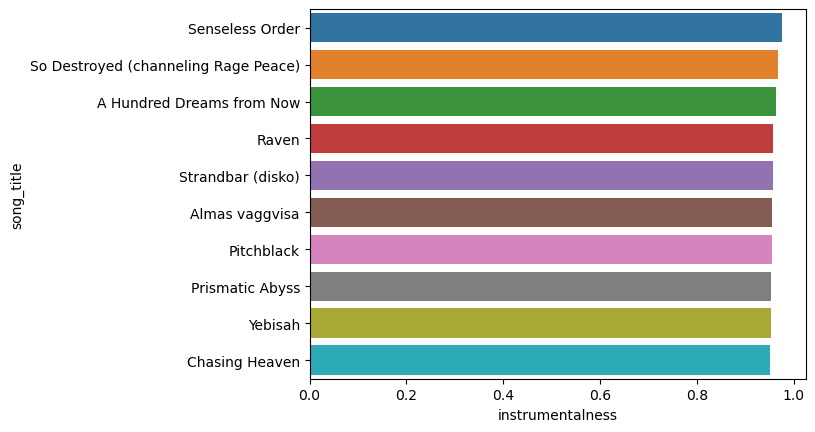

In [21]:
sns.barplot(x = 'instrumentalness', y = 'song_title', data = top_ten_instrumentalness)

([<matplotlib.patches.Wedge at 0x1b0f22bd160>,
 [Text(0.8850929912163064, 0.6531541907541984, 'Senseless Order'),
  Text(-0.3577223114358084, 1.0402089924149966, 'So Destroyed (channeling Rage Peace)'),
  Text(-1.0998037473314475, -0.02077780921333319, 'A Hundred Dreams from Now'),
  Text(-0.3250293066495939, -1.0508834139993286, 'Raven'),
  Text(0.8931086234624437, -0.6421502835762196, 'Strandbar (disko)')],
 [Text(0.4827779952088943, 0.3562659222295627, '20.24%'),
  Text(-0.1951212607831682, 0.5673867231354527, '20.07%'),
  Text(-0.5998929530898804, -0.011333350479999919, '19.99%'),
  Text(-0.1772887127179603, -0.5732091349087246, '19.86%'),
  Text(0.48715015825224195, -0.3502637910415743, '19.84%')])

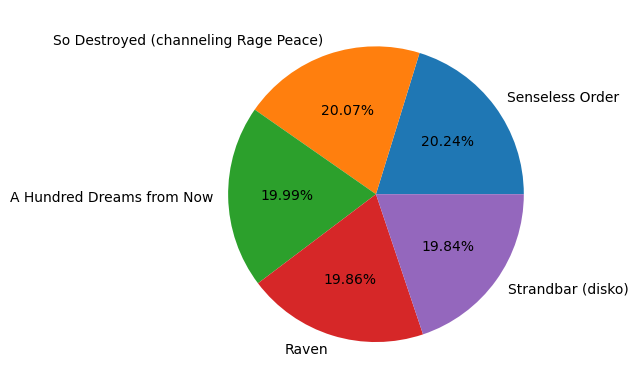

In [22]:
plt.pie(x = "instrumentalness", data = top_ten_instrumentalness[:5], labels= top_ten_instrumentalness.song_title[:5] , autopct="%1.2f%%")

#### Multiple feature plots

In [23]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [24]:
feature_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo',  'valence','loudness']

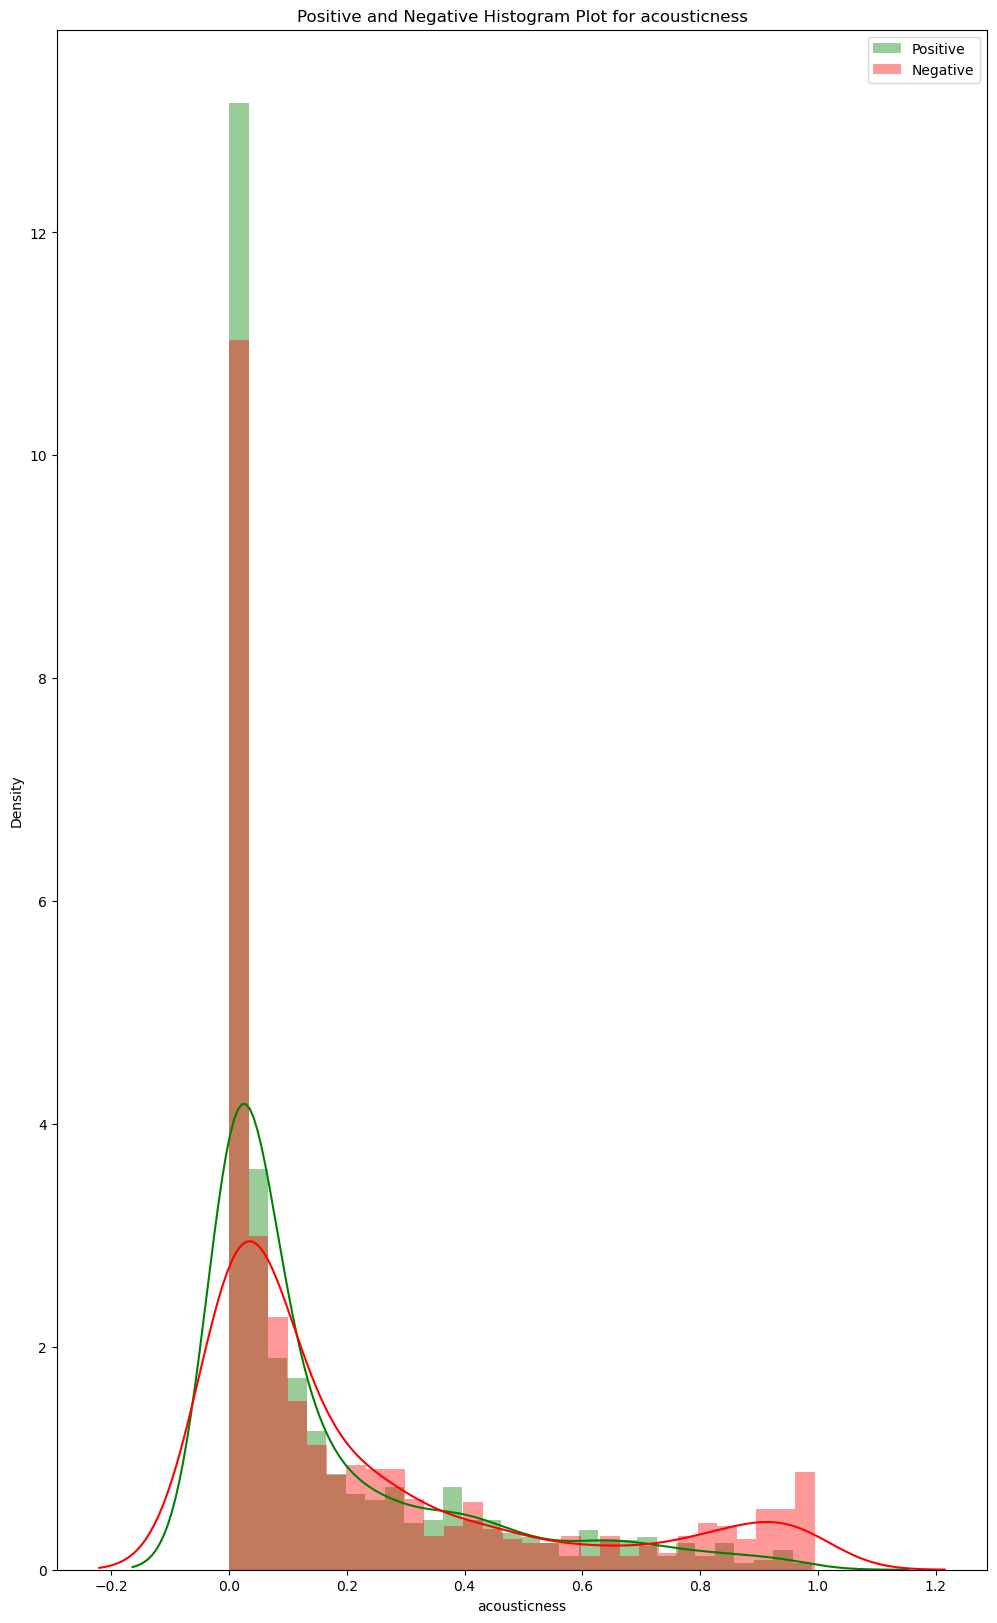

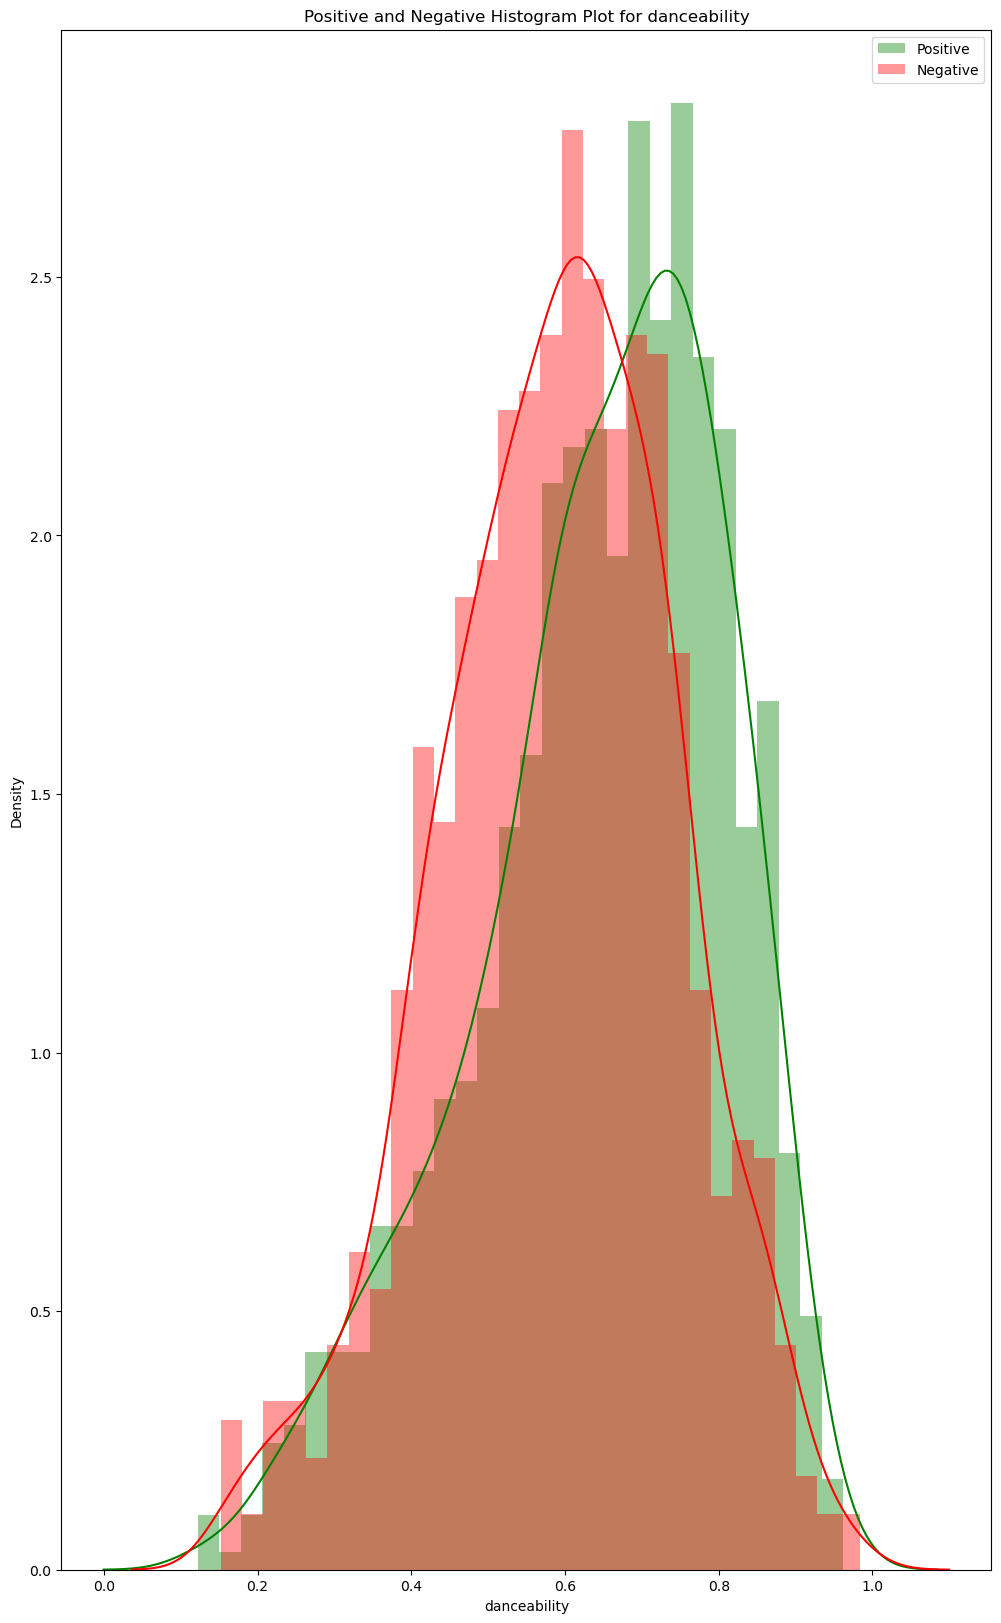

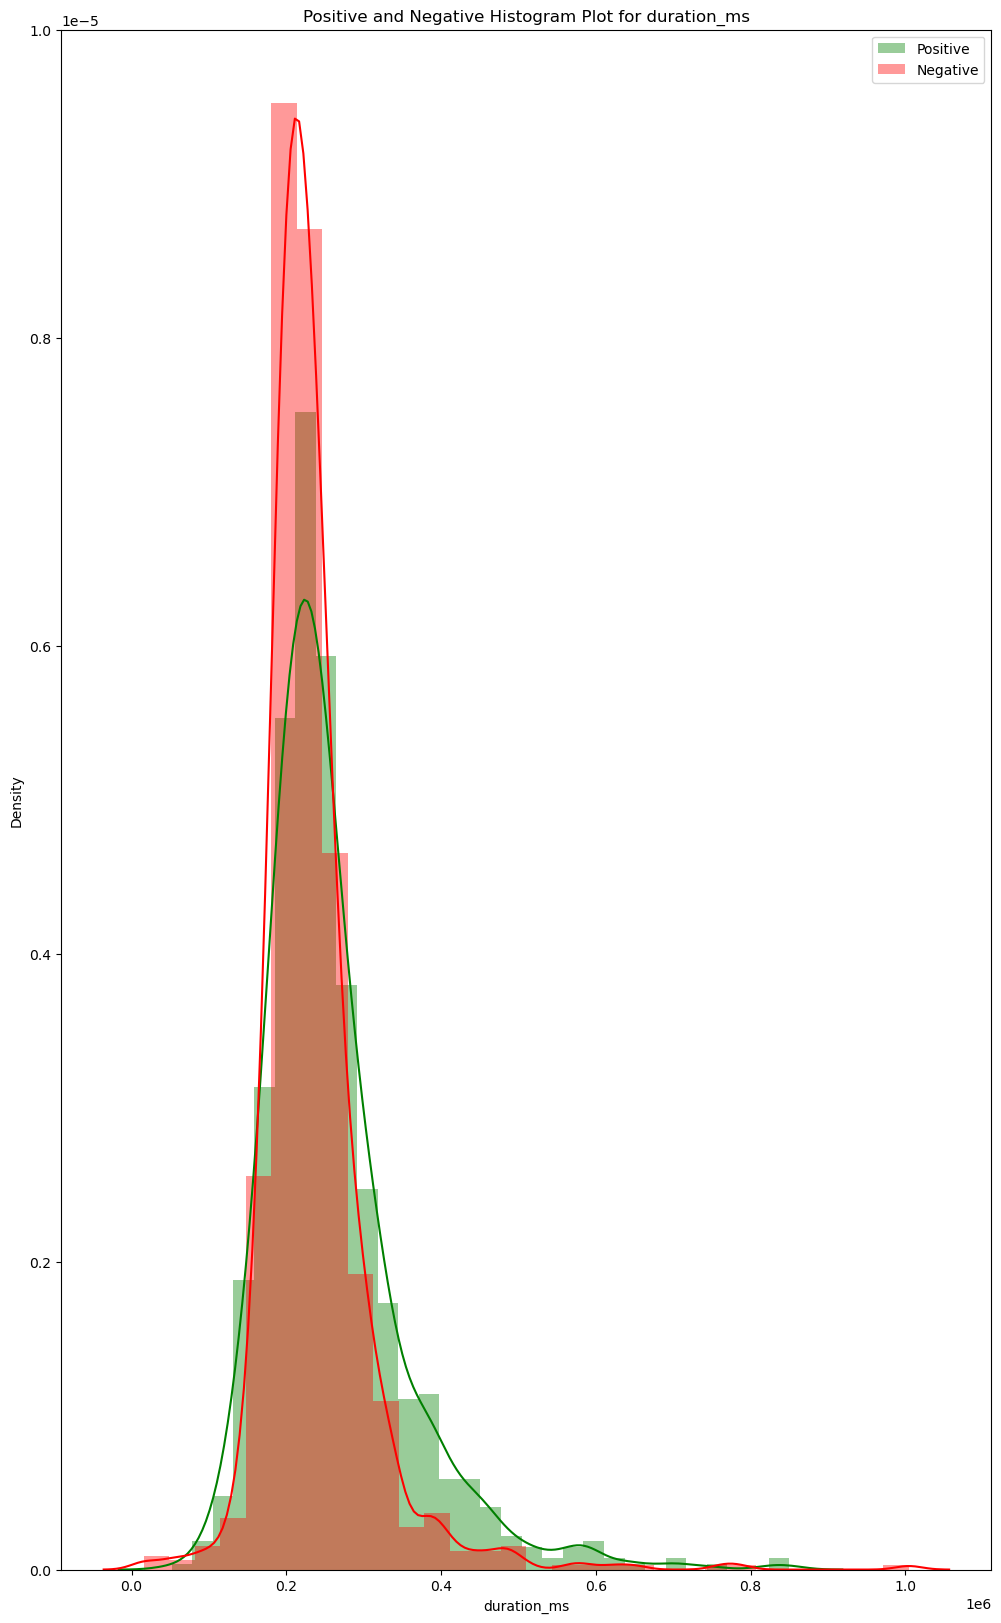

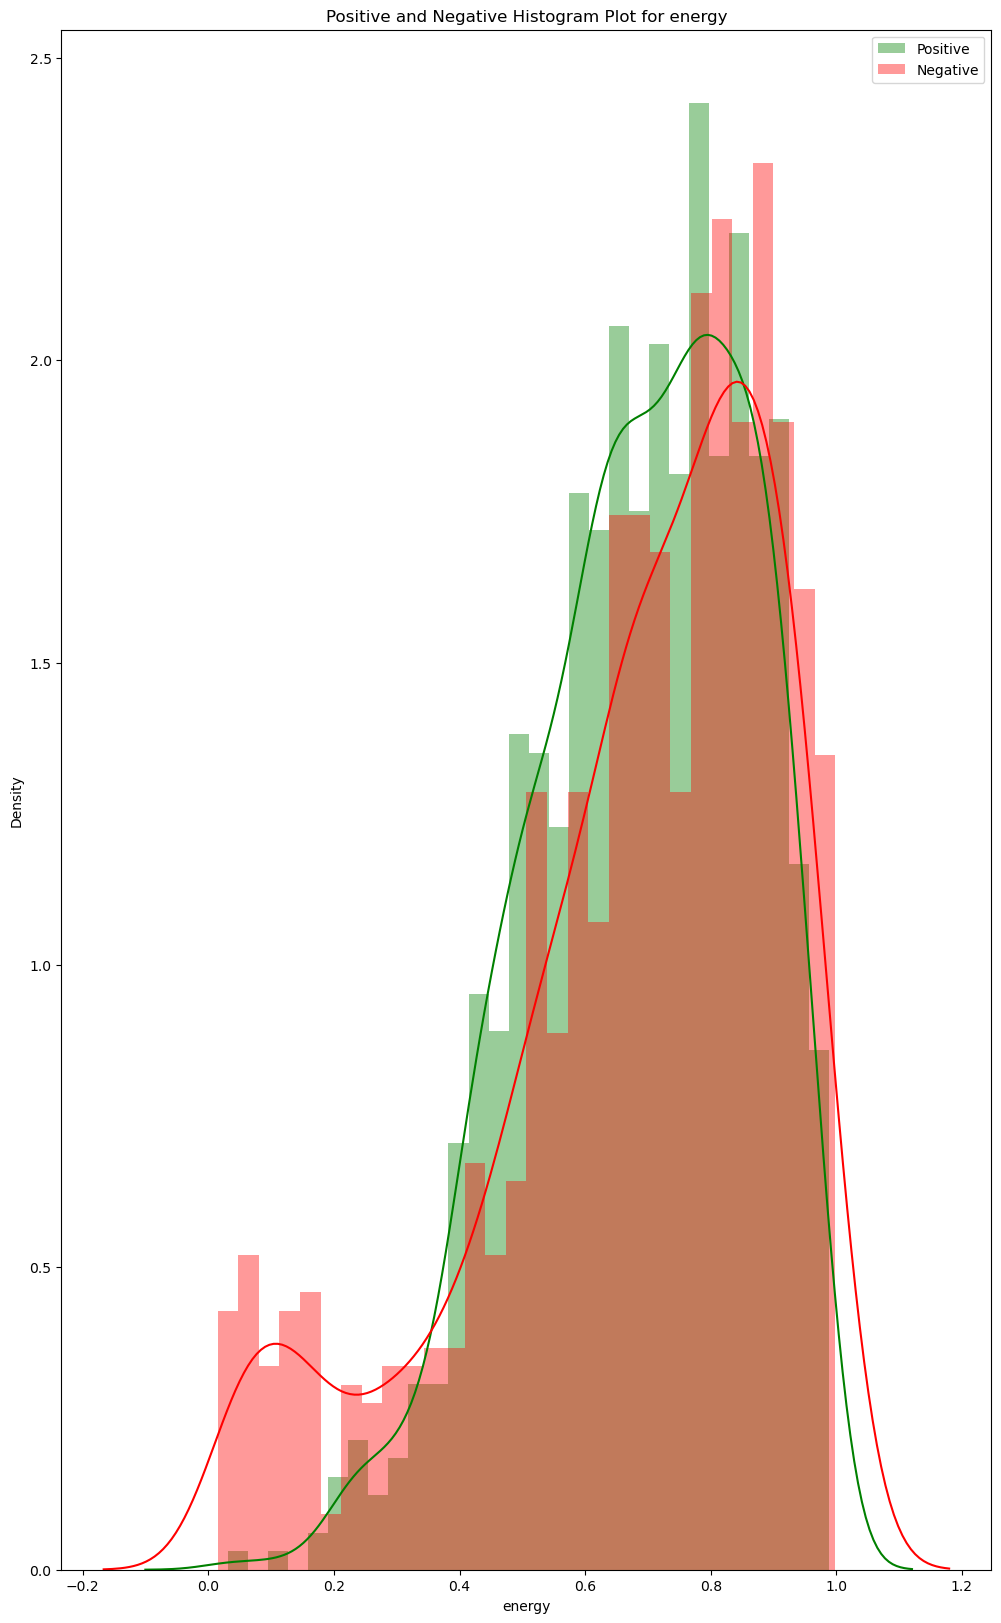

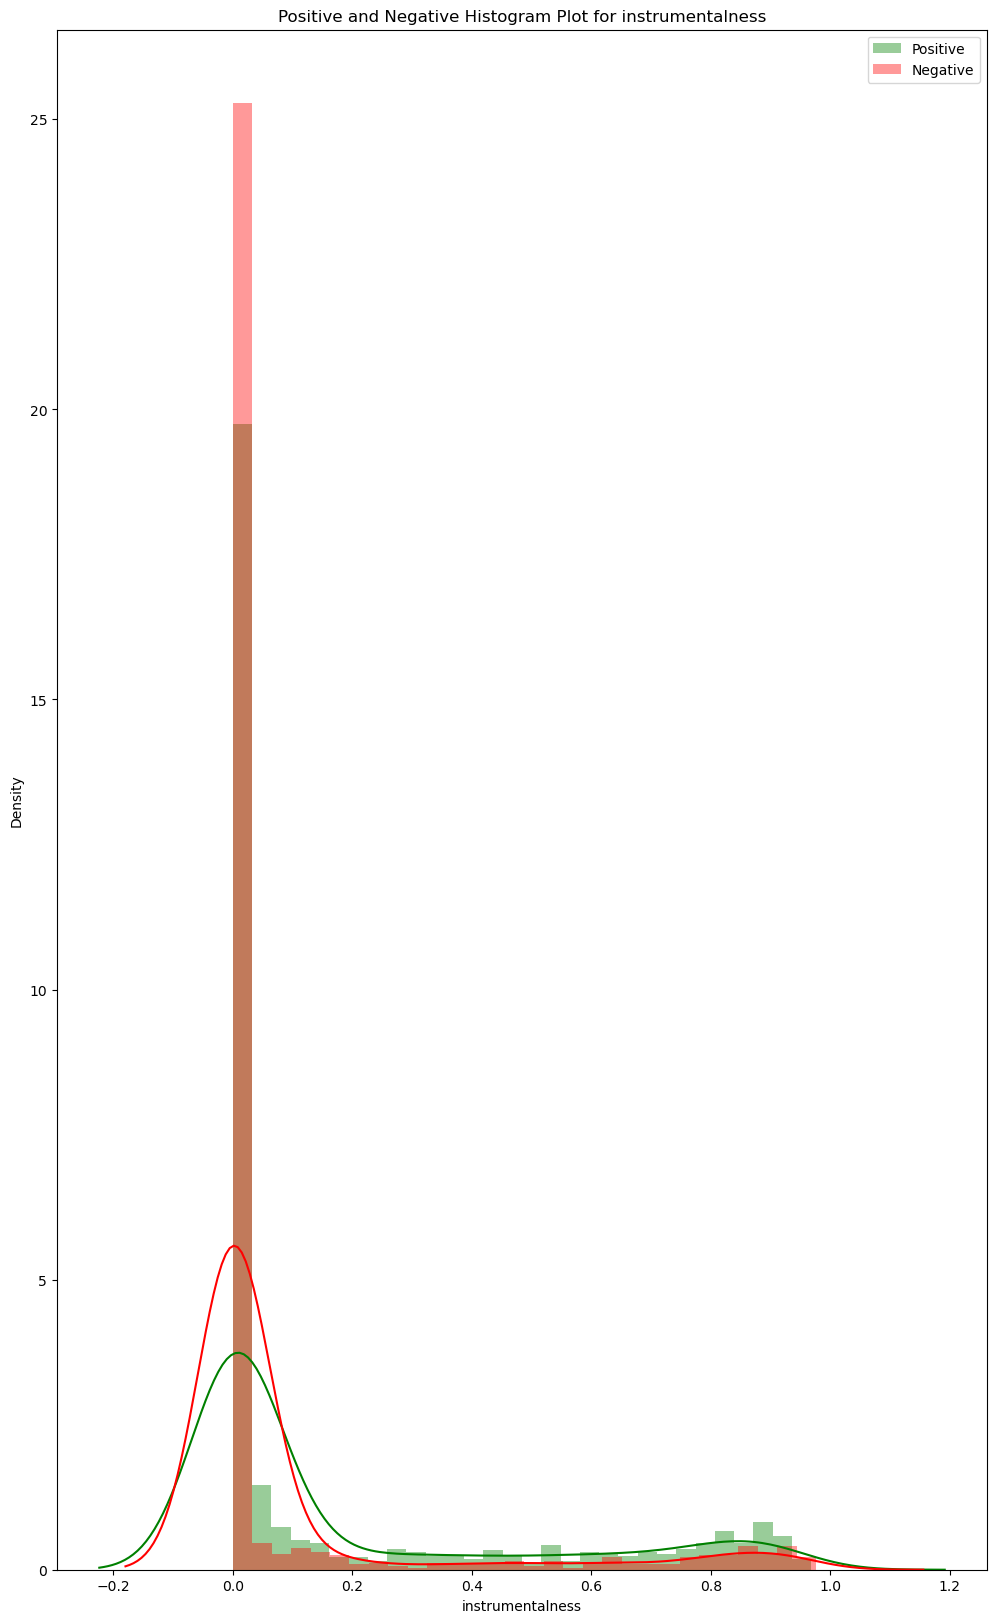

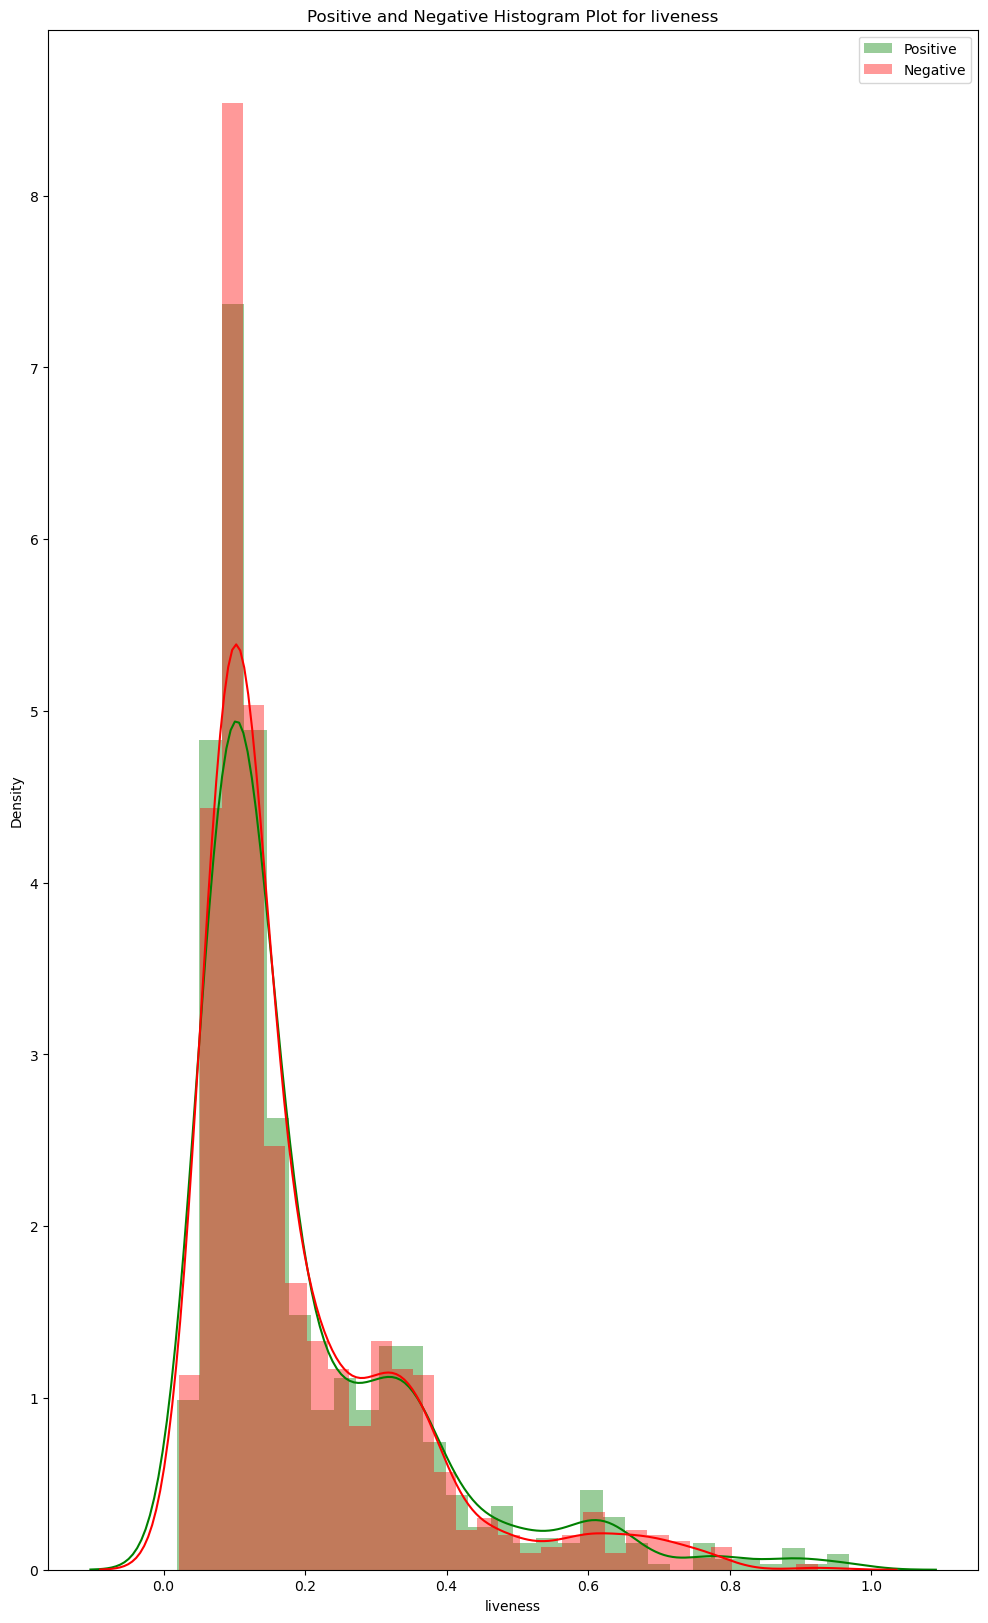

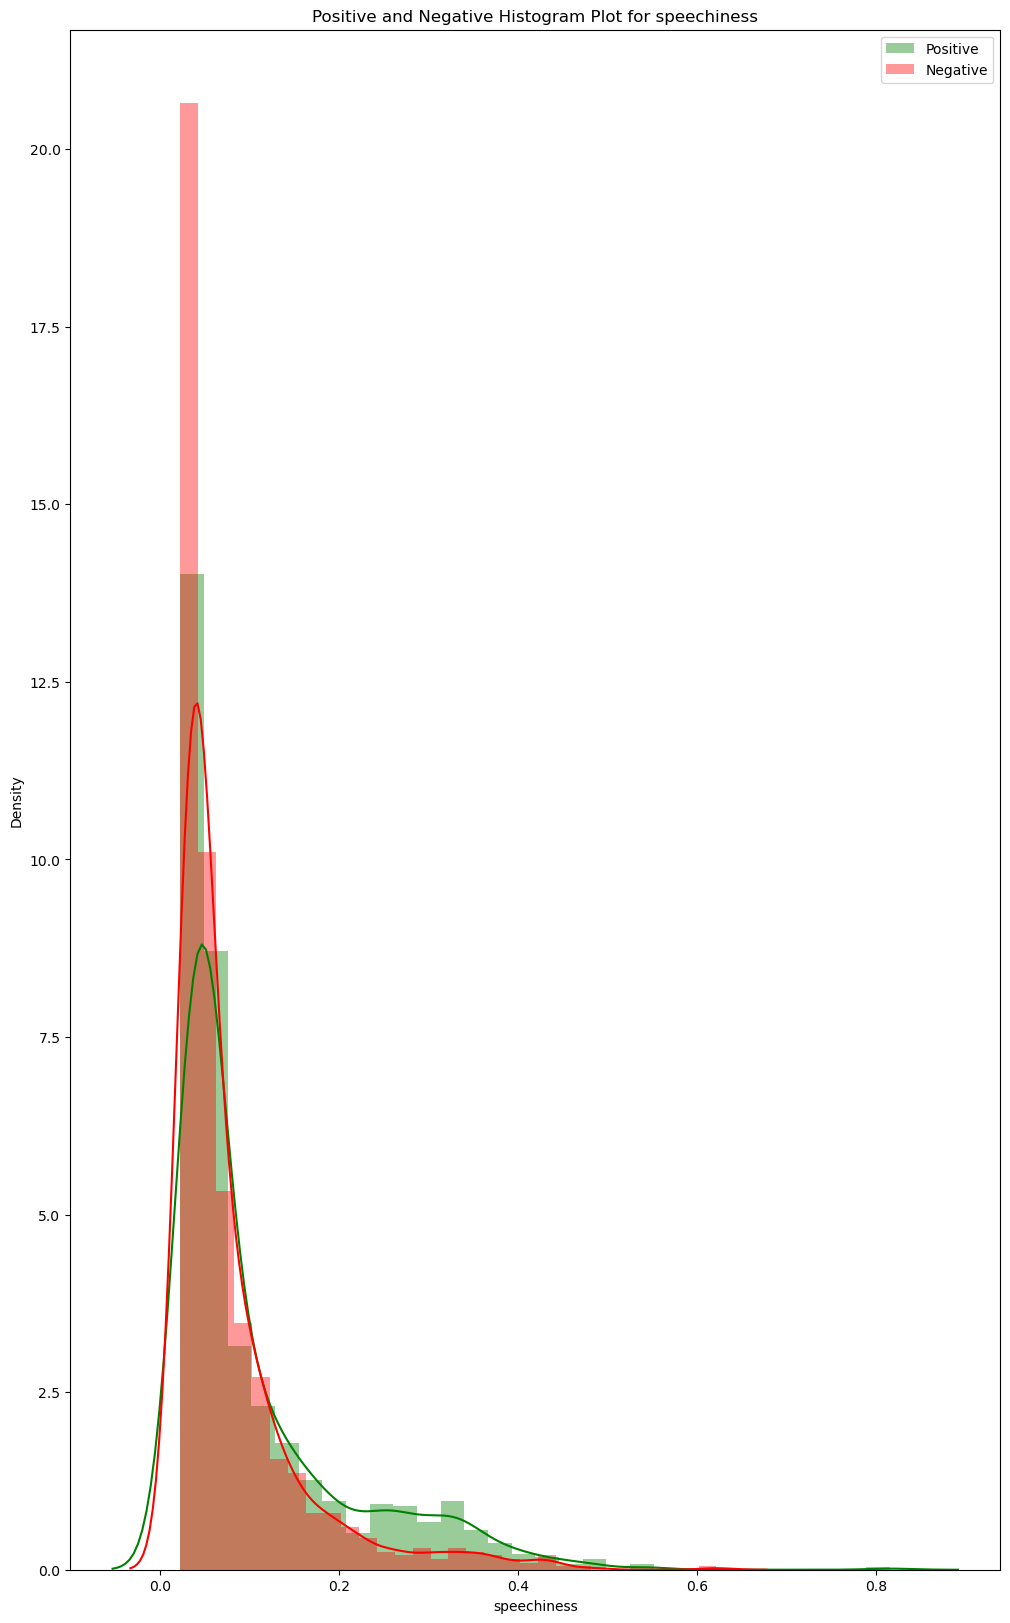

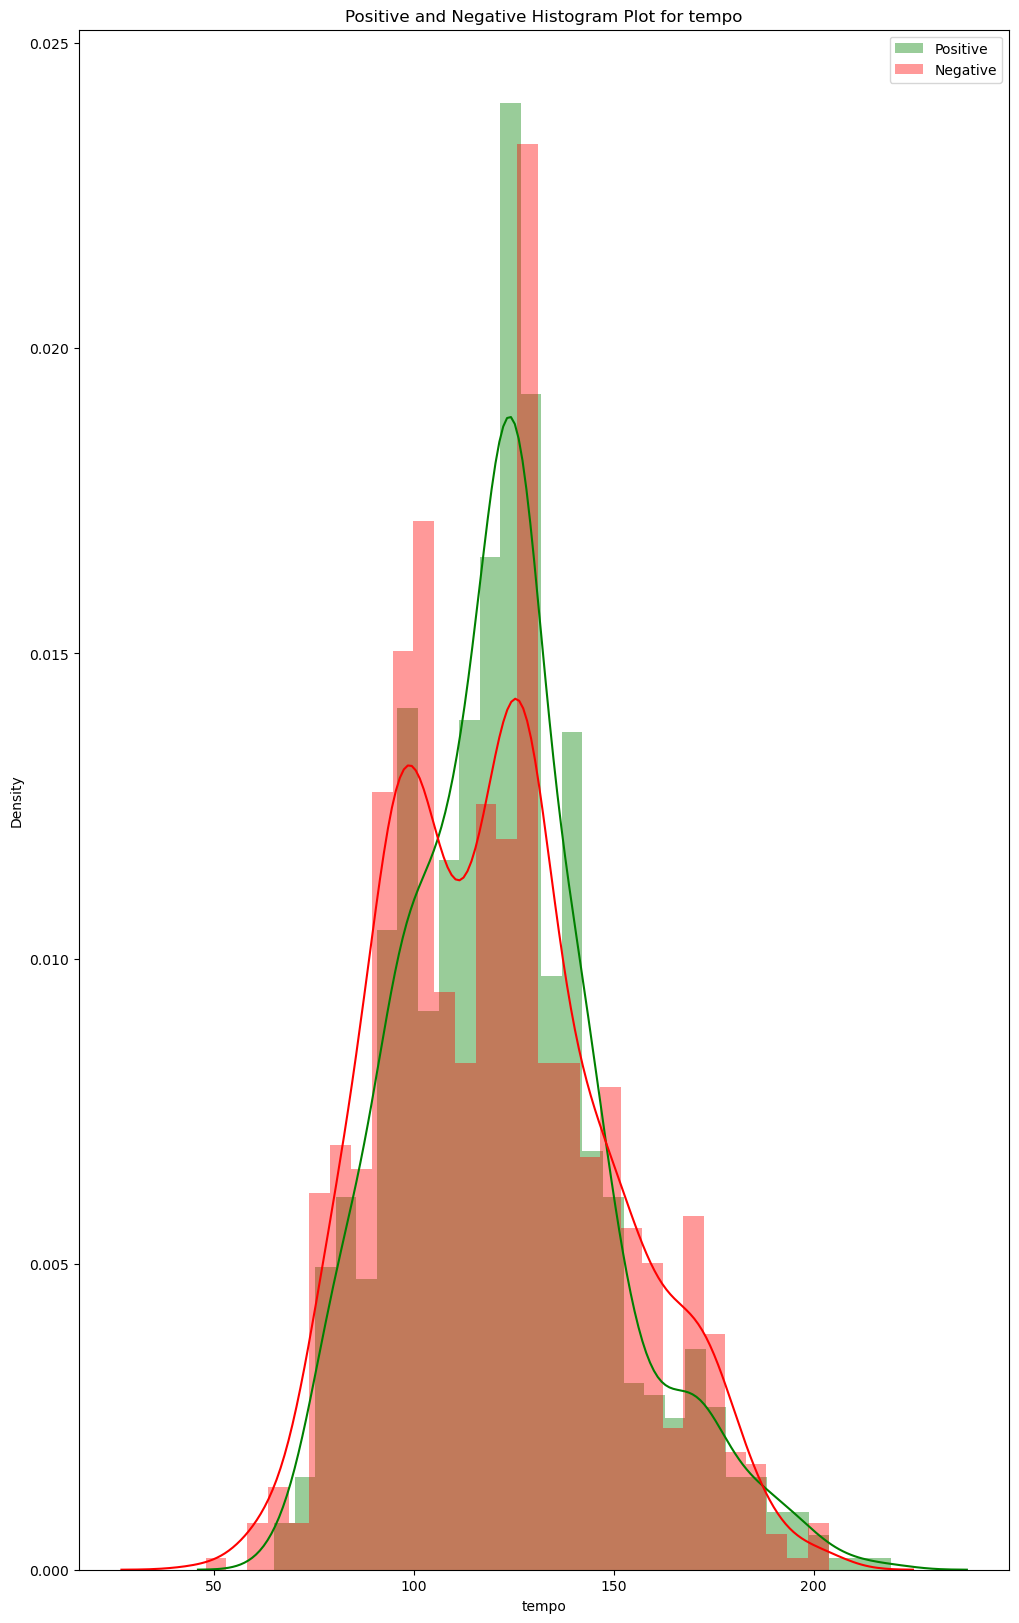

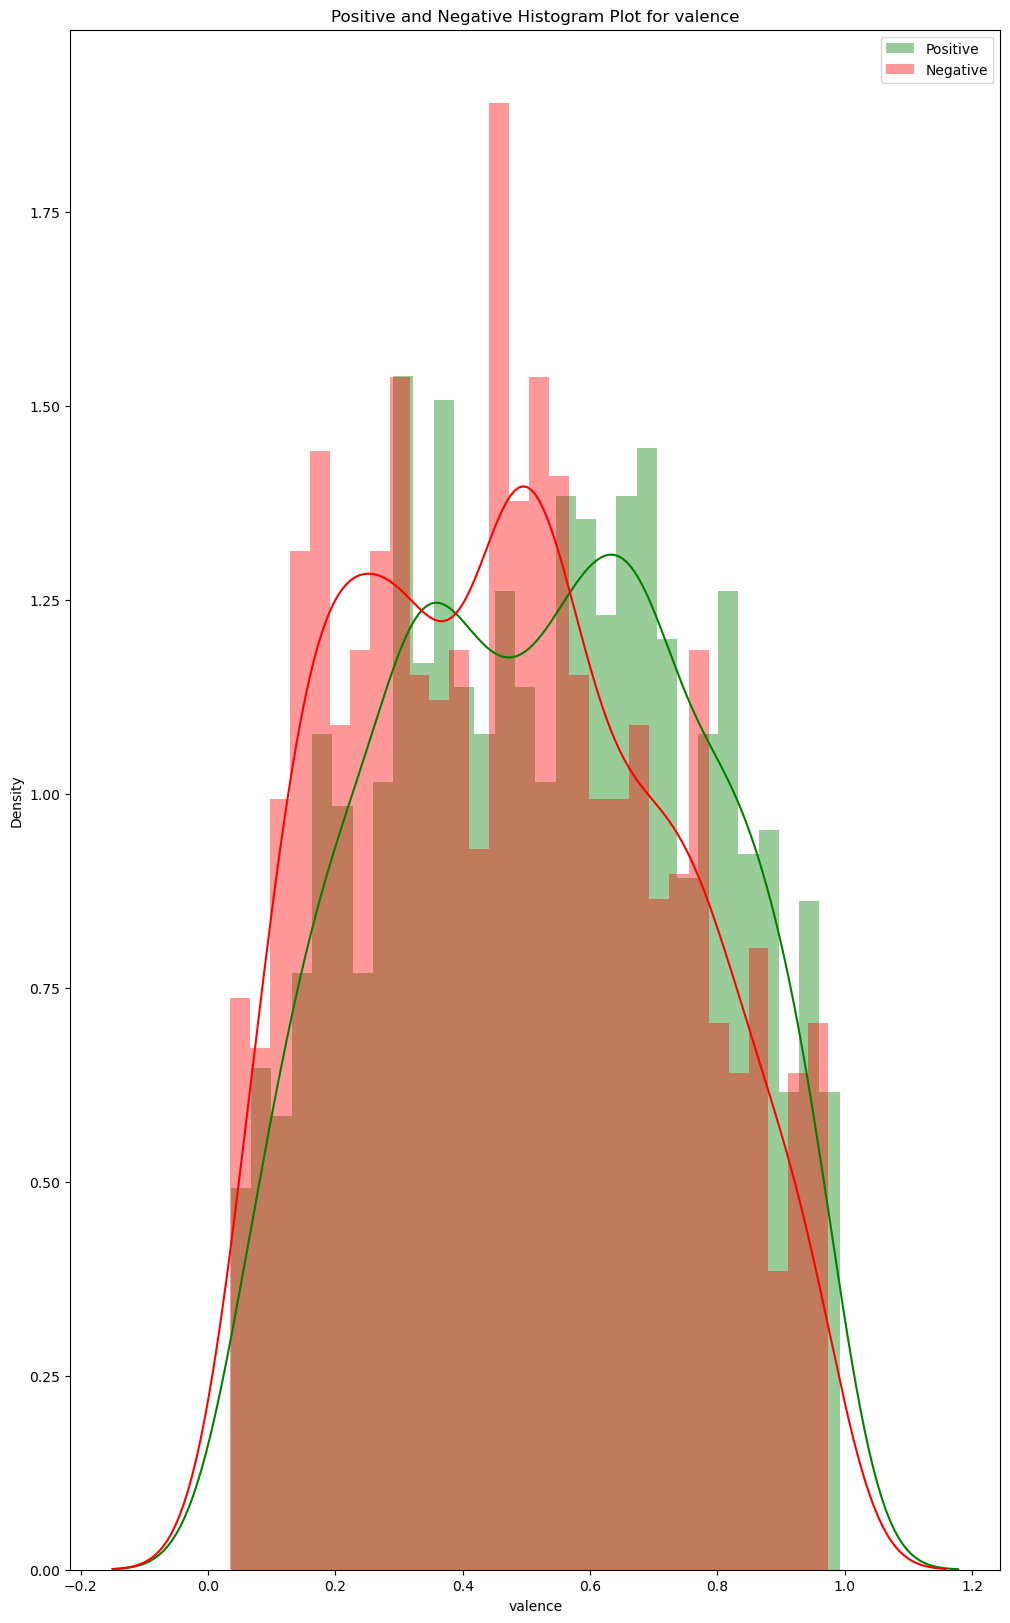

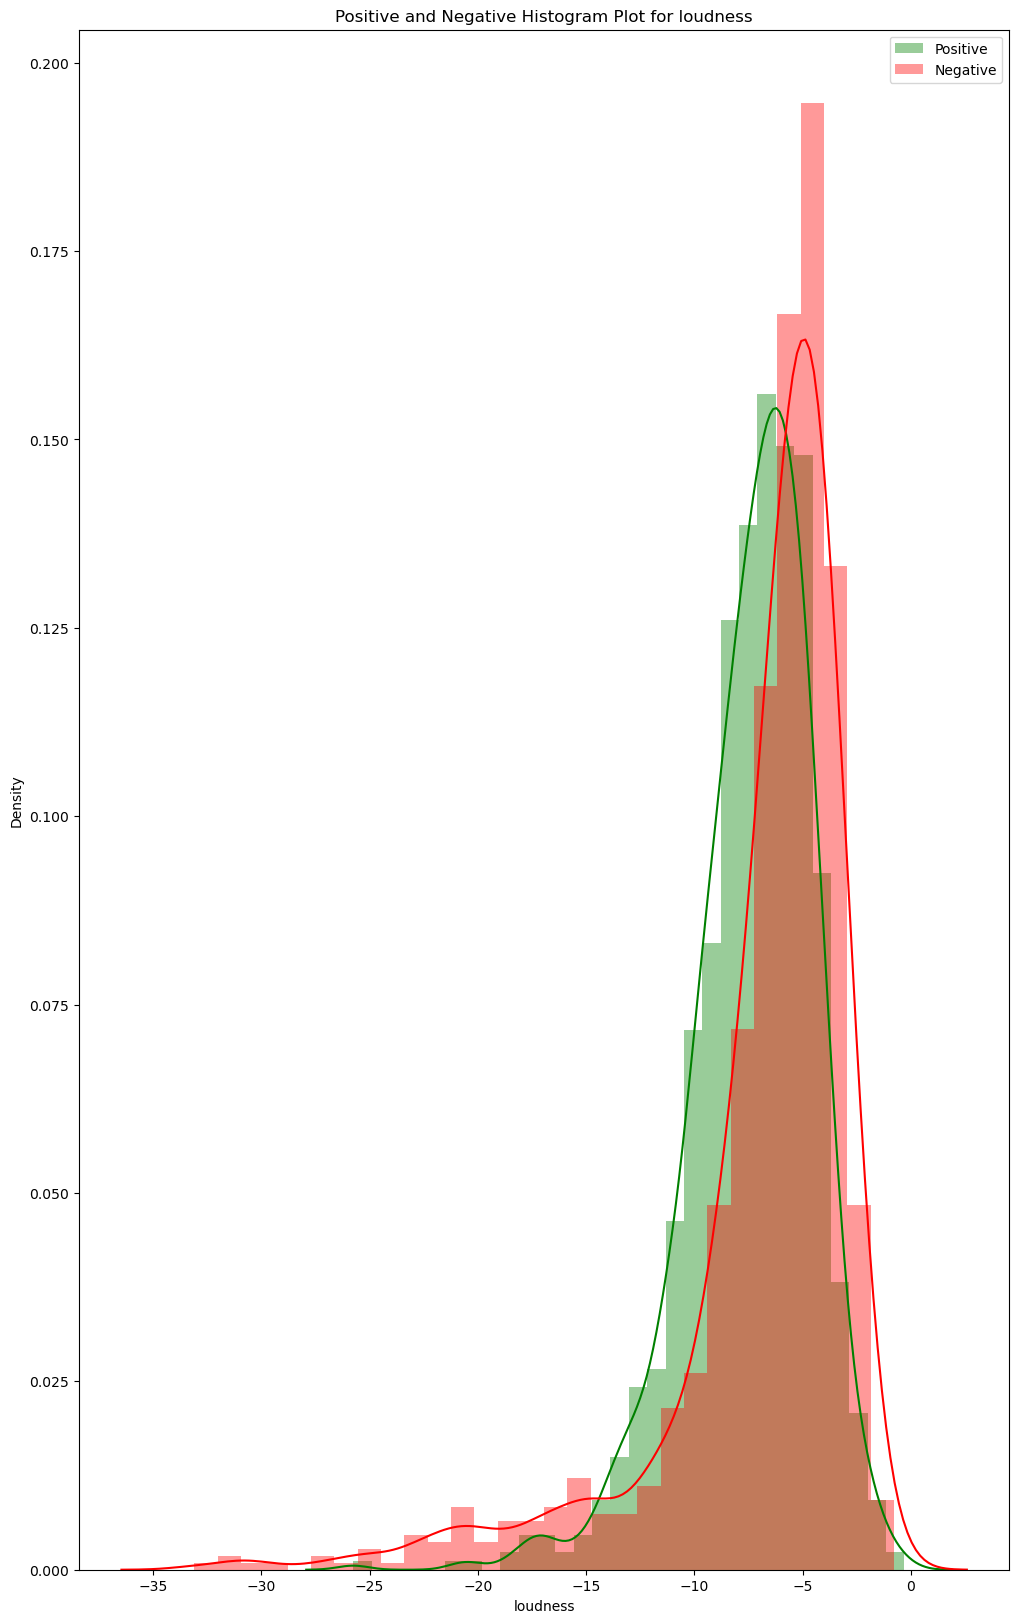

In [25]:
for feature_col in feature_columns:
    pos_data = df[df["target"]==1][feature_col]
    neg_data = df[df["target"]==0][feature_col]
    
    plt.figure(figsize = (12,20))
    
    sns.distplot(pos_data, bins = 30, label ="Positive", color = "green")
    sns.distplot(neg_data, bins = 30, label = "Negative", color = "red")
    plt.legend(loc = "upper right")
    plt.title(f"Positive and Negative Histogram Plot for {feature_col}")

#### Top 10 energetic tracks

In [26]:
top_ten_energetic_tracks = df[["energy", "song_title"]].sort_values(by = 'energy',ascending = False )[:10]

In [27]:
top_ten_energetic_tracks

,energy,song_title
1299,0.998,No Absolution
1322,0.997,Pitchblack
1297,0.994,A Darkened Gospel
1347,0.993,Unanswered
2015,0.992,First Contact
1680,0.992,Paranoia
1332,0.992,Beautiful Agony
1328,0.991,Down into the Abyss
1681,0.990,Hated
1296,0.990,Black Colors


<AxesSubplot:xlabel='energy', ylabel='song_title'>

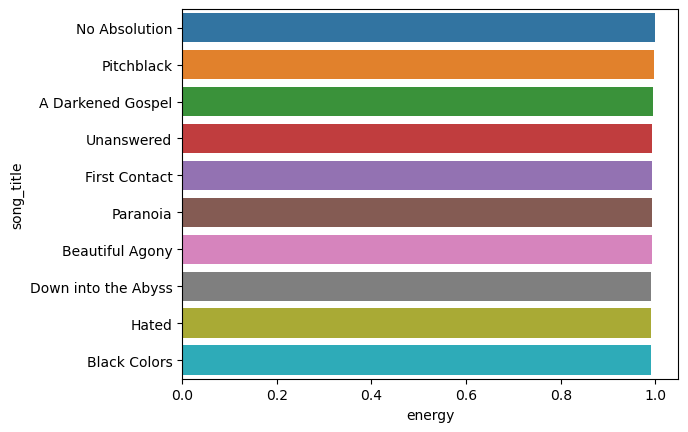

In [35]:
sns.barplot(x = 'energy', y = 'song_title', data = top_ten_energetic_tracks)

#### Most common durations

In [29]:
common_duration = np.array(df['duration_ms'])

In [42]:
mode = st.mode(common_duration)

In [43]:
mode

192000

#### Top 10 tracks with most valence

In [31]:
top_ten_valence_tracks = df[['valence', 'song_title']].sort_values(by = 'valence', ascending = False)[:10]

In [32]:
top_ten_valence_tracks

,valence,song_title
460,0.992,Abataka - Original Mix
912,0.975,I'm Walkin' - 2002 Digital Remaster
1966,0.974,"To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)"
207,0.973,Look at You
48,0.973,Azon de ma gnin kpevi
337,0.972,Let's Lovedance Tonight - Danny Krivit Re-edit...
1590,0.972,Jelly On A Plate
838,0.971,Let's Lovedance Tonight - Danny Krivit Re-edit...
497,0.968,Mi Swing es Tropical
112,0.967,Please Mr. Postman


([<matplotlib.patches.Wedge at 0x1b0f37a6a30>,
 [Text(0.883811243805227, 0.6548875363934313, 'Senseless Order'),
  Text(-0.35789089124122014, 1.0401510034444832, 'So Destroyed (channeling Rage Peace)'),
  Text(-1.0998997682632048, -0.014849234813578248, 'A Hundred Dreams from Now'),
  Text(-0.3310293971380141, -1.049008836106943, 'Raven'),
  Text(0.8917438478607602, -0.6440441831136164, 'Strandbar (disko)')],
 [Text(0.4820788602573965, 0.3572113834873261, '20.30%'),
  Text(-0.19521321340430187, 0.5673550927878999, '19.95%'),
  Text(-0.5999453281435662, -0.008099582625588134, '19.93%'),
  Text(-0.18056148934800767, -0.5721866378765142, '19.91%'),
  Text(0.48640573519677827, -0.35129682715288163, '19.91%')])

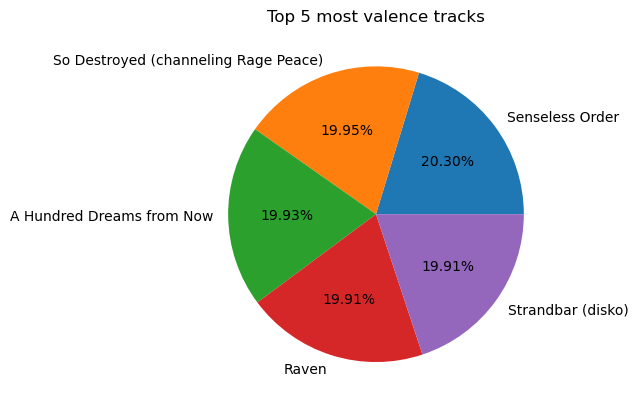

In [33]:
plt.title("Top 5 most valence tracks")
plt.pie(x = 'valence', data = top_ten_valence_tracks[:5], labels= top_ten_instrumentalness.song_title[:5], autopct = "%1.2f%%")